In [1]:
import matplotlib.pyplot as plt

In [2]:
def raw_data_processing(file_path):
    doc=[]
    temp={}
    with open(file_path) as f:
        for line in f:
            content=line.rstrip().split('\t')
            if len(content)==1:
                doc.append(temp)
                temp={}
            else:
                if len(content[0].split(' '))==2:
                    if not content[0]+'_0' in temp:
                        temp[content[0]+'_0']=float(content[1])
                    else:
                        if content[0]+'_1' in temp:
                            temp[content[0]+'_2']=float(content[1])
                        else:
                            temp[content[0]+'_1']=float(content[1])
                else:
                    temp[content[0]]=float(content[1])
    return doc

def pickup(proc_bw_content_0,proc_bw_content_1,proc_bw_content_2,content):
    for i in content:
        proc_bw_content_0.append(i['real_bw_0'])
        proc_bw_content_1.append(i['real_bw_1'])
        proc_bw_content_2.append(i['real_bw_2'])
        
def smooth(proc_bw_content_0):
    for i in range(len(proc_bw_content_0)):
        if proc_bw_content_0[i] < 0.001:
            proc_bw_content_0[i]=0
        if proc_bw_content_0[i] > 100:
            proc_bw_content_0[i]=proc_bw_content_0[i-1]

def mysum(content_0,content_1,content_2,content_sum):
    for i in range(len(content_0)):
        content_sum.append(content_0[i]+content_1[i]+content_2[i])

In [4]:
file_path="C:\\Users\\ycy\\Desktop\\SS_Abstract_WRR.dat"
content=raw_data_processing(file_path)

In [5]:
content

[{'Standard_NC_YCY_v1.0': 1208211823.0,
  'set bw_0': 80.0,
  'set loss_0': 0.0001,
  'set delay_0': 10.0,
  'set bw_1': 10.0,
  'set loss_1': 0.0005,
  'set delay_1': 20.0,
  'set bw_2': 70.0,
  'set loss_2': 0.0001,
  'set delay_2': 30.0,
  'real_bw_0': 6.5207,
  'real_loss_0': 0.0,
  'real_delay_0': 10.0,
  'real_tx_packets_0': 12924.0,
  'real_rx_packets_0': 12922.0,
  'real_bw_1': 1.9236,
  'real_loss_1': 0.0,
  'real_delay_1': 41.0,
  'real_tx_packets_1': 3330.0,
  'real_rx_packets_1': 3330.0,
  'real_bw_2': 5.53879,
  'real_loss_2': 0.0,
  'real_delay_2': 30.0,
  'real_tx_packets_2': 10647.0,
  'real_rx_packets_2': 10645.0},
 {'Standard_NC_YCY_v1.0': 1208211845.0,
  'set bw_0': 70.0,
  'set loss_0': 0.005,
  'set delay_0': 40.0,
  'set bw_1': 90.0,
  'set loss_1': 0.005,
  'set delay_1': 15.0,
  'set bw_2': 1.0,
  'set loss_2': 0.0001,
  'set delay_2': 40.0,
  'real_bw_0': 6.90308e-310,
  'real_loss_0': 2.35569e+251,
  'real_delay_0': 1.62691e+219,
  'real_tx_packets_0': 6.90308

In [6]:
proc_bw_content_0=[]
proc_bw_content_1=[]
proc_bw_content_2=[]
proc_bw_content_sum=[]

In [7]:
pickup(proc_bw_content_0,proc_bw_content_1,proc_bw_content_2,content)
smooth(proc_bw_content_0)
smooth(proc_bw_content_1)
smooth(proc_bw_content_2)
mysum(proc_bw_content_0,proc_bw_content_1,proc_bw_content_2,proc_bw_content_sum)

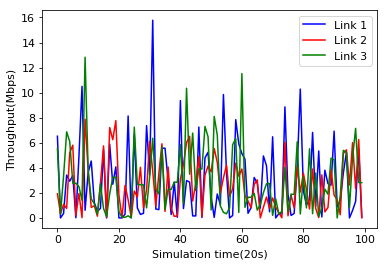

In [8]:
plt.plot(proc_bw_content_0,'b',label="Link 1")
plt.plot(proc_bw_content_1,'r',label="Link 2",)
plt.plot(proc_bw_content_2,'g',label="Link 3")
#plt.plot(proc_bw_content_sum,linestyle='-',color='mediumvioletred',label="Total",linewidth=2)
plt.xlabel("Simulation time(20s)",fontsize=11)
plt.ylabel("Throughput(Mbps)",fontsize=11)
plt.legend(fontsize=11)
#plt.legend(bbox_to_anchor=(1.05,0.75),loc=3,borderaxespad=0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [9]:
proc_bw_content_sum

[13.98309,
 0.634247,
 4.768066,
 11.058503,
 14.23219,
 11.96264,
 2.9801194,
 9.35944,
 11.9320141,
 21.315369,
 11.18886,
 6.8970959999999994,
 3.3397330000000003,
 0.96418,
 6.2384569999999995,
 11.960089,
 0.12770510000000002,
 15.02573,
 12.18275,
 15.09966,
 2.332423,
 0.05917809,
 2.943651,
 9.760701,
 0.0687259,
 16.06699,
 5.154897,
 6.957039,
 3.803008,
 10.416753,
 12.81353,
 25.88283,
 3.9386229999999998,
 6.131672,
 17.14758,
 6.758211,
 9.338169999999998,
 3.300055,
 5.825697,
 3.0616689999999998,
 18.30301,
 6.1602239999999995,
 19.35805,
 12.8706,
 8.277637,
 5.112076999999999,
 16.0736,
 4.0479956999999995,
 15.517859999999999,
 15.85002,
 5.996632,
 13.6836992,
 12.943100000000001,
 3.9611359999999998,
 13.493400999999999,
 8.126961,
 2.551923,
 8.34712,
 18.54842,
 9.669496,
 20.56563,
 7.316682999999999,
 3.361337,
 3.274783,
 7.86464,
 6.432339,
 1.8644224,
 7.807843,
 8.560690000000001,
 3.997299,
 8.276487,
 2.385852,
 1.0671110000000001,
 0.8622926,
 18.91852,


In [10]:
proc_bw_content_sum_EDPF=[0.32472100000000004,
 0.2240277,
 0.23051460000000001,
 0.1833769,
 0.319249,
 0.319495,
 0.2074868,
 0.1719888,
 0.489487,
 2.557748,
 0.1990921,
 2.627921,
 0.380146,
 0.2157133,
 0.2748558,
 0.332483,
 0.333882,
 9.29243,
 11.009319999999999,
 0.26743100000000003,
 0.2548398,
 0.1772753,
 14.068379999999998,
 0.3014551,
 0.246517,
 10.4856,
 0.2971782,
 0.2073234,
 0.250219,
 0.29519819999999997,
 0.2921179,
 10.5813,
 0.2986753,
 0.399995,
 12.478729999999999,
 0.19506220000000002,
 0.289442,
 0.1698132,
 0.20544460000000003,
 0.20763760000000003,
 14.71265,
 0.249898,
 0.357876,
 12.458089999999999,
 0.2668182,
 0.345934,
 0.34569,
 0.34489400000000003,
 0.365736,
 0.39471100000000003,
 0.18056250000000001,
 0.2735933,
 0.2798039,
 0.2958281,
 0.2735215,
 0.2600397,
 0.27357849999999995,
 0.28331280000000003,
 11.78671,
 0.2943618,
 0.2837413,
 0.2929824,
 0.2146132,
 0.3035737,
 8.81014,
 2.851147,
 0.292939,
 0.2600719,
 0.630968,
 0.9453659999999999,
 0.20381680000000002,
 0.1987652,
 0.921366,
 0.46807099999999996,
 0.5323310000000001,
 0.43566900000000003,
 0.567539,
 0.3844580000000001,
 8.69105,
 0.344523,
 0.2145918,
 0.18864540000000002,
 0.356022,
 0.2099958,
 2.6321269999999997,
 0.307713,
 0.1903597,
 0.324513,
 0.1891201,
 12.49876,
 0.318368,
 0.681245,
 0.21548079999999997,
 10.65705,
 10.66614,
 0.24087730000000002,
 0.5551470000000001,
 0.24493579999999998,
 0.31720899999999996,
 0.23749099999999998]

In [12]:
proc_bw_content_sum_RR=[0.2981436,
 0.163688,
 0.1654283,
 0.1253385,
 0.2294797,
 0.2917846,
 0.2623097,
 0.1363146,
 0.42664599999999997,
 0.2824597,
 0.20327630000000002,
 0.370249,
 0.2886112,
 0.159382,
 0.3036444,
 0.2686632,
 0.34706400000000004,
 4.553929999999999,
 1.221092,
 0.28244939999999996,
 0.24820359999999997,
 0.1551641,
 9.72041,
 0.316936,
 0.17389549999999998,
 0.206663,
 0.312545,
 0.2080431,
 0.2751136,
 0.39803,
 0.2937406,
 0.33149,
 0.2810341,
 0.19560599999999997,
 0.2325953,
 0.21945199999999998,
 0.193833,
 0.14766680000000001,
 0.23159639999999998,
 0.2335835,
 8.96391,
 0.305596,
 0.368978,
 0.343116,
 0.2105738,
 0.1924217,
 0.2295158,
 0.2965204,
 0.2344754,
 0.341271,
 0.196662,
 0.23135689999999998,
 0.2089758,
 0.2457816,
 0.1846296,
 0.20686699999999997,
 0.1685258,
 0.1708884,
 1.6612529999999999,
 0.336149,
 0.322102,
 0.2465001,
 0.2332779,
 0.1848796,
 0.1985391,
 0.380092,
 0.2892162,
 0.2671364,
 1.519103,
 0.357329,
 0.1943933,
 0.2084432,
 0.365194,
 0.376432,
 11.08801,
 0.37563599999999997,
 0.42522499999999996,
 0.314928,
 0.370503,
 0.37109899999999996,
 0.24392350000000002,
 0.2211745,
 0.439774,
 0.2079571,
 0.2885435,
 0.311284,
 0.29868700000000004,
 0.2489046,
 0.2354502,
 0.34422200000000003,
 0.312668,
 0.43127899999999997,
 0.1926372,
 0.246956,
 0.2561114,
 0.17225659999999998,
 0.23481049999999998,
 0.1665195,
 0.215661,
 0.2333268]

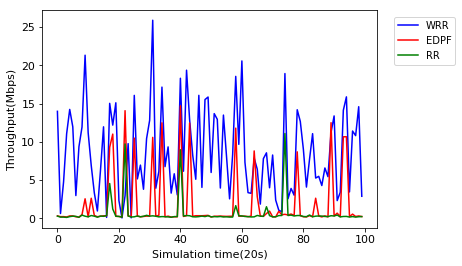

In [13]:
plt.plot(proc_bw_content_sum,'b',label="WRR")
plt.plot(proc_bw_content_sum_EDPF,'r',label="EDPF",)
plt.plot(proc_bw_content_sum_RR,'g',label="RR")
#plt.plot(proc_bw_content_sum,linestyle='-',color='mediumvioletred',label="Total",linewidth=2)
plt.xlabel("Simulation time(20s)",fontsize=11)
plt.ylabel("Throughput(Mbps)",fontsize=11)
#plt.legend(fontsize=11)
plt.legend(bbox_to_anchor=(1.05,0.75),loc=3,borderaxespad=0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()